In [10]:
"""
@author: pho

A fresh start using modern pipeline methods without all the excessive imports. Created by Pho on 2022-06-14

"""
# noinspection JupyterPackage
%load_ext autoreload
%autoreload 2
import sys
import importlib

from numba import jit
import numpy as np
import pandas as pd

# required to enable non-blocking interaction:
%gui qt5


from pyphocorehelpers.gui.PhoUIContainer import PhoUIContainer
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.External.pyqtgraph.Qt import QtCore, QtGui, QtWidgets

# Pho's Formatting Preferences
from pyphocorehelpers.preferences_helpers import set_pho_preferences
set_pho_preferences()
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%g" % x))

%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# from pyphoplacecellanalysis.GUI.Qt
# from pyqtplot_MainWindow import PhoPipelineMainWindow
# from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.PhoMainPipelineWindow.pyqtplot_MainWindow import PhoPipelineMainWindow

from pyphoplacecellanalysis.External.pyqtgraph.flowchart import Flowchart, Node
import pyphoplacecellanalysis.External.pyqtgraph.flowchart.library as fclib
from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.ReloadableNodeLibrary import ReloadableNodeLibrary

from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.PhoPipelineMainWindow.pyqtplot_MainWindow import PhoPipelineMainWindow

# GUI.Qt.MainApplicationWindows.PhoPipelineMainWindow.pyqtplot_MainWindow

# PhoMainPipelineWindow.pyqtplot_MainWindow import PhoPipelineMainWindow


In [3]:
# from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.pyqtplot_Flowchart import plot_flowchartWidget
# pipeline_flowchart_window, pipeline_flowchart_app = plot_flowchartWidget(title='PhoMainPipelineFlowchartApp')
# Add the flowchart widget. This is actually not the programmatic programming environment itself, it's the column that lists the nodes and lets you set their parameters.
# flowchart_controls_widget = mainAppWindow.flowchart.widget()

In [4]:

## Create an empty flowchart with a single input and output
flowchart = Flowchart(terminals={
    'dataIn': {'io': 'in'},
    'dataOut': {'io': 'out'}    
})


# # Add the flowchart widget. This is actually not the programmatic programming environment itself, it's the column that lists the nodes and lets you set their parameters.
# flowchart_controls_widget = flowchart.widget()
pipeline_start_x = 0
flowchart.setInput(dataIn=None)

# Setup the nodes in the flowchart:
ReloadableNodeLibrary.setup_custom_node_library(flowchart)

# Create the nodes:
pipeline_input_node = flowchart.createNode('PipelineInputDataNode', pos=(pipeline_start_x-400, 50))

pipeline_filter_node = flowchart.createNode('PipelineFilteringDataNode', pos=(pipeline_start_x-26, 50))

pipeline_computation_node = flowchart.createNode('PipelineComputationsNode', pos=(pipeline_start_x+154, 50))

# pipeline_display_node = flowchart.createNode('PipelineDisplayNode', pos=(pipeline_start_x+280, 120))

# # Pipeline Result Visualization Node:
# pipeline_result_viz_node = flowchart.createNode('PipelineResultVisNode', pos=(pipeline_start_x+280, 220))
# pipeline_result_viz_node.on_add_function = on_add_function
# pipeline_result_viz_node.on_remove_function = on_remove_function
flowchart

num_known_types: 2
ctrl_node_ops: [('data_mode', 'combo', {'values': ['bapun', 'kdiba', 'custom...'], 'index': 0})]
 custom_ops:[('reload', 'action')]
 self.uiTemplate: [('data_mode', 'combo', {'values': ['bapun', 'kdiba', 'custom...'], 'index': 0})]

ctrl_node_ops: []
 custom_ops:[('included_configs_table', 'extendedchecktable', {'columns': ['filter'], 'rows': ['test1', 'test2']}), ('refilter', 'action')]
 self.uiTemplate: []

ctrl_node_ops: []
 custom_ops:[('recompute', 'action'), ('included_configs_table', 'extendedchecktable', {'columns': ['compute'], 'rows': ['test1', 'test2']})]
 self.uiTemplate: []



<Node Flowchart @244ebc46670>

In [5]:
## Note: can do programmatic updates on the nodes via:
"""
## get the Node's control widget and place it inside the main window
filterCtrl = filterNode.ctrlWidget()
someLayout.addWidget(filterCtrl)

## later on, process data through the node
filteredData = filterNode.process(inputTerminal=rawData)

"""

"\n## get the Node's control widget and place it inside the main window\nfilterCtrl = filterNode.ctrlWidget()\nsomeLayout.addWidget(filterCtrl)\n\n## later on, process data through the node\nfilteredData = filterNode.process(inputTerminal=rawData)\n\n"

In [6]:
## Wire them up:

# Setup connections:
flowchart.connectTerminals(flowchart['dataIn'], pipeline_input_node['known_mode'])

# Input Node Outputs:
flowchart.connectTerminals(pipeline_input_node['loaded_pipeline'], pipeline_filter_node['pipeline'])
flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_filter_node['active_data_mode'])

# flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_display_node['mode'])

# Filter Node Outputs:
flowchart.connectTerminals(pipeline_filter_node['filtered_pipeline'], pipeline_computation_node['pipeline'])
flowchart.connectTerminals(pipeline_filter_node['computation_configs'], pipeline_computation_node['computation_configs'])
# flowchart.connectTerminals(pipeline_filter_node['filter_configs'], pipeline_display_node['filter_configs'])

# Computation Node Outputs:
# flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_display_node['pipeline'])
# flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_display_node['computation_configs'])

# flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_result_viz_node['pipeline'])
# flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_result_viz_node['computation_configs'])

flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], flowchart['dataOut']) # raw pipeline output from computation node


In [7]:
## Build Controls to set node parameters:
inputCtrl = pipeline_input_node.ctrlWidget()
filterCtrl = pipeline_filter_node.ctrlWidget()
computationCtrl = pipeline_computation_node.ctrlWidget()

In [8]:
# Add the controls to a layout:
layout_widget = pg.LayoutWidget()
layout_widget.setWindowTitle('Manu Flowchar Widget Display')

# (inputCtrl, filterCtrl, computationCtrl)
layout_widget.addWidget(inputCtrl, row=0, col=0)
layout_widget.addWidget(filterCtrl, row=1, col=0)
layout_widget.addWidget(computationCtrl, row=2, col=0)
layout_widget.show()
layout_widget.resize(800,900)

PipelineInputDataNode data_mode from dropdown list: kdiba
basedir is already Path object.
	 basepath: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53
	 session_name: 2006-6-07_11-26-53
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.epochs_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.spikes.mat... done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session... Saving updated position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position.npy... 2006-6-07_11-26-53.position.npy saved
done.
	 Failure loading .interpolated_spike_positions.npy. Must recompute.

	 Saving updated interpolated spike position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-

c:\users\pho\repos\neuropy\neuropy\core\laps.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['lap_id']] = laps_df[['lap_id']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['start_spike_index', 'end_spike_index']] = laps_df[['start_spike_index', 'end_spike_index']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Applying session filter named "maze1"...
Constraining to epoch with times (start: 22.26, end: 1739.1533641185379)
computing neurons mua for session...



c:\users\pho\repos\neuropy\neuropy\core\laps.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['lap_id']] = laps_df[['lap_id']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['start_spike_index', 'end_spike_index']] = laps_df[['start_spike_index', 'end_spike_index']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


on_table_check_changed(row: maze1, col: compute, state: 2)
	 [['maze1', True]]
Performing single_computation on filtered_session with filter named "maze1"...
Performing perform_registered_computations(...) with 8 registered_computation_functions...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.
Recomputing active_epoch_time_dependent_placefields... 	 done.
Recomputing active_epoch_time_dependent_placefields2D... 	 done.


c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:181: RuntimeWarning: overflow encountered in double_scalars
  C_tau_n = 1.0 / np.sum(un_normalized_result) # normalize the result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:182: RuntimeWarning: invalid value encountered in multiply
  result = C_tau_n * un_normalized_result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  C_tau_n = 1.0 / np.sum(un_normalized_result) # normalize the result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:221: RuntimeWarning: divide by zero encountered in true_divide
  return C * np.exp(numerator/denominator)
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:236: RuntimeWarning: invalid value encountered 

perform_registered_computations(...): 
	accumulated_errors: []
Performing single_computation on filtered_session with filter named "maze1"...
Performing perform_registered_computations(...) with 8 registered_computation_functions...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.
Recomputing active_epoch_time_dependent_placefields... 	 done.
Recomputing active_epoch_time_dependent_placefields2D... 	 done.


c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:181: RuntimeWarning: overflow encountered in double_scalars
  C_tau_n = 1.0 / np.sum(un_normalized_result) # normalize the result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:182: RuntimeWarning: invalid value encountered in multiply
  result = C_tau_n * un_normalized_result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  C_tau_n = 1.0 / np.sum(un_normalized_result) # normalize the result
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:221: RuntimeWarning: divide by zero encountered in true_divide
  return C * np.exp(numerator/denominator)
c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\Analysis\reconstruction.py:236: RuntimeWarning: invalid value encountered 

perform_registered_computations(...): 
	accumulated_errors: []


In [ ]:
## Where is the result from .process(...) going?

## later on, process data through the node
filteredData = filterNode.process(inputTerminal=rawData)

In [ ]:
flowchart_controls_widget = flowchart.widget() # FlowchartCtrlWidget
flowchart_window = flowchart_controls_widget.cwWin

pipeline_flowchart_nodes = pipeline_flowchart.nodes()

### Try to extract the results into the Jupyter-lab notebook from the Flowchart nodes:

In [75]:
# Note this works, meaning I can get the values just like I do in the regular Jupyter-Lab notebook
curr_active_pipeline = pipeline_computation_node.outputs()['computed_pipeline'].value()
curr_active_pipeline # NeuropyPipeline

In [83]:
# List available properties from the dictionary:
enable_debug_print = True


def _get_valid_computation_results_config_names(curr_active_pipeline):
    # computed_epochs_list: the names of all the configs (usually epochs, like 'maze1' or 'maze2') that have been computed
    computed_config_names_list = list(curr_active_pipeline.computation_results.keys()) # ['maze1', 'maze2']
    print(f'computed_config_names_list: {computed_config_names_list}') 

    complete_computed_config_names_list = []
    for curr_config_name in computed_config_names_list:
        # Try to see if the current config is valid or incomplete
        curr_config_incomplete_reason = None
        active_computation_results = curr_active_pipeline.computation_results.get(curr_config_name, None)
        if active_computation_results is None:
            curr_config_incomplete_reason = 'MISSING_computation_results'
        # Check the members:
        active_computed_data = curr_active_pipeline.computation_results[curr_config_name].computed_data
        if active_computed_data is None:
            curr_config_incomplete_reason = 'INVALID_computation_results_computed_data'
        active_computation_config = curr_active_pipeline.computation_results[curr_config_name].computation_config
        if active_computation_config is None:
            curr_config_incomplete_reason = 'INVALID_computation_results_computation_config'
        if curr_config_incomplete_reason is not None:
            print(f'curr_config_incomplete_reason: {curr_config_incomplete_reason}')
        else:
            complete_computed_config_names_list.append(curr_config_name)
            
    return complete_computed_config_names_list


curr_epoch_labels = list(curr_active_pipeline.sess.epochs.labels) # ['pre', 'maze1', 'post1', 'maze2', 'post2']
if enable_debug_print:
    print(f'curr_epoch_labels: {curr_epoch_labels}')
    
curr_named_timeranges = [curr_active_pipeline.sess.epochs.get_named_timerange(a_label) for a_label in curr_epoch_labels]
if enable_debug_print:
    print(f'curr_named_timeranges: {curr_named_timeranges}')

# Filters list:
all_filters_list = list(curr_active_pipeline.filtered_sessions.keys())
if enable_debug_print:
    print(f'all_filters_list: {all_filters_list}')

    
all_computed_timeranges_list = _get_valid_computation_results_config_names(curr_active_pipeline)
if enable_debug_print:
    print(f'all_computed_timeranges_list: {all_computed_timeranges_list}')
    
"""
    curr_epoch_labels: ['maze1', 'maze2']
    curr_named_timeranges: [<NamedTimerange: {'name': 'maze1', 'start_end_times': array([22.26, 1739.15])};>, <NamedTimerange: {'name': 'maze2', 'start_end_times': array([1739.15, 1932.42])};>]
    all_filters_list: ['maze1']
    computed_config_names_list: ['maze1']
    all_computed_timeranges_list: ['maze1']
"""

# active_config_name = 'maze1'


curr_epoch_labels: ['maze1', 'maze2']
curr_named_timeranges: [<NamedTimerange: {'name': 'maze1', 'start_end_times': array([22.26, 1739.15])};>, <NamedTimerange: {'name': 'maze2', 'start_end_times': array([1739.15, 1932.42])};>]
all_filters_list: ['maze1']
computed_config_names_list: ['maze1']
all_computed_timeranges_list: ['maze1']


"\n    curr_epoch_labels: ['maze1', 'maze2']\n    curr_named_timeranges: [<NamedTimerange: {'name': 'maze1', 'start_end_times': array([22.26, 1739.15])};>, <NamedTimerange: {'name': 'maze2', 'start_end_times': array([1739.15, 1932.42])};>]\n    all_filters_list: ['maze1']\n    computed_config_names_list: ['maze1']\n    all_computed_timeranges_list: ['maze1']\n"

In [ ]:
display_outputs = curr_node.outputs()['display_outputs'].value()

In [ ]:
fileSelectWidget = pg.FileDialog()
layout_widget.addWidget(inputCtrl, row=3, col=0)

In [ ]:
layout_widget = None

# Custom Save Widget Testing

In [25]:
from pyphocorehelpers.gui.Qt.InlineFilesystemPathSelectWidget.InlineFilesystemPathSelectWidget import InlineFilesystemPathSelectWidget

# Build a CtrlWidget for exporting the results out to file:
export_ui = PhoUIContainer('ExportNode')
# export_ui.root_widget = QtWidgets.QWidget()
export_ui.layout_widget = pg.LayoutWidget()
export_ui.layout_widget.setWindowTitle('ExportNode CtrlWidget')
# fbox = QFormLayout()

# Build the export path selection widget
export_ui.path_data_root_select_widget = InlineFilesystemPathSelectWidget('Export')
export_ui.layout_widget.addWidget(export_ui.path_data_root_select_widget, colspan=2)
export_ui.layout_widget.nextRow()
export_ui.btnExport = pg.FeedbackButton('Export')
export_ui.layout_widget.addWidget(export_ui.btnExport, colspan=1, col=1)

export_ui.layout_widget.show()
# export_ui.root_widget.setLayout(export_ui.layout_widget)
# export_ui.root_widget.show()
# export_ui.path_data_root_select_widget.show()

## pg.ParameterList version:

In [116]:
## test add/remove
## Define Custom Parameter types:
import pyphoplacecellanalysis.External.pyqtgraph.parametertree.parameterTypes as pTypes
from pyphoplacecellanalysis.External.pyqtgraph.parametertree import Parameter, ParameterTree
## this group includes a menu allowing the user to add new parameters into its child list
class ScalableGroup(pTypes.GroupParameter):
    def __init__(self, **opts):
        opts['type'] = 'group'
        opts['addText'] = "Add"
        opts['addList'] = ['str', 'float', 'int'] # dropdown list of items to add (shows up in the combo box)
        pTypes.GroupParameter.__init__(self, **opts)
    
    def addNew(self, typ):
        val = {
            'str': '',
            'float': 0.0,
            'int': 0
        }[typ]
        self.addChild(dict(name="ScalableParam %d" % (len(self.childs)+1), type=typ, value=val, removable=True, renamable=True))
        
class ExportHdf5KeysGroup(pTypes.GroupParameter):
    def __init__(self, **opts):
        opts['type'] = 'group'
        opts['addText'] = "Add Key"
        opts['addList'] = ['str', 'float', 'int'] # dropdown list of items to add (shows up in the combo box)
        pTypes.GroupParameter.__init__(self, **opts)
    
    def addNew(self, typ):
        val = {
            'str': '',
            'float': 0.0,
            'int': 0
        }[typ]
        self.addChild(dict(name="/filtered_sessions/YOUR_SESSION_NAME/YOUR_KEY", type=typ, value=val, removable=True, renamable=True))
        
        
def _default_parameters_save_restore_state_button_children():
    """ Builds the default save/restore state buttons for a parameter item """
    return {
        'name': 'Save/Restore functionality', 'type': 'group', 'children': [
        {'name': 'Save State', 'type': 'action'},
        {
            'name': 'Restore State', 'type': 'action', 'children': [
            {'name': 'Add missing items', 'type': 'bool', 'value': True},
            {'name': 'Remove extra items', 'type': 'bool', 'value': True},
        ]},
    ]}

In [117]:
all_computed_timeranges_list

['maze1']

In [118]:
# children = [
#         dict(name='Export Path', type='file', dialogLabel='test label'),
#         dict(name='a', type='slider', value=5, limits=[0, 10]),
#         dict(name='b', type='slider', value=0.1, limits=[-5, 5], step=0.1),
#         dict(name='c', type='slider', value=2, span=np.linspace(0, 2*np.pi, 1000)),
#         dict(name='Cell Types', type='checklist', value=[], limits=['one', 'two', 'three', 'four']),
#         ScalableGroup(name="Expandable Parameter Group", tip='Click to add children', children=[
#             {'name': 'ScalableParam 1', 'type': 'str', 'value': "default param 1"},
#             {'name': 'ScalableParam 2', 'type': 'str', 'value': "default param 2"},
#         ]),
#     ]

from pyphoplacecellanalysis.General.Mixins.ExportHelpers import get_default_pipeline_data_keys, _test_save_pipeline_data_to_h5, get_h5_data_keys, save_some_pipeline_data_to_h5, load_pipeline_data_from_h5  #ExportHelpers



def _build_export_parameters_tree(parameter_names='ExportParams', finalized_output_cache_file='data/pipeline_cache_store.h5', include_state_save_restore_buttons=True, debug_print=False):
    """ Do the actual export task here:
        
        Implicitly captures: curr_active_pipeline 
    """
    def _build_current_export_keys(include_whitelist = None):
        # List existing keys in the file:
        # loaded_extant_keys = get_h5_data_keys(finalized_output_cache_file=finalized_output_cache_file)
        # if debug_print:
        #     print(f'loaded_extant_keys: {loaded_extant_keys}')
        
        # Filter existing keys to selections only:
        key_children_list = []
        if include_whitelist is None:
            active_config_names_list = all_computed_timeranges_list
        else:
            # otherwise only include the items in include_whitelist
            active_config_names_list = [value for value in include_whitelist if value in all_computed_timeranges_list] # entry must be in all_computed_timeranges_list
            
        for a_key in active_config_names_list:
            curr_default_key_children_dict = get_default_pipeline_data_keys(a_key)
            curr_children_list = [{'name': value_key_name, 'type': 'str', 'value': value_name} for value_name, value_key_name in curr_default_key_children_dict.items()]
            key_children_list = key_children_list + curr_children_list
            
        if debug_print:
            print(f'key_children_list: {key_children_list}')
            
        return key_children_list
        
    def _simple_export_dict_params():
        key_children_list = _build_current_export_keys()
        children = [
                dict(name='Export Path', type='file', dialogLabel='test label', value=finalized_output_cache_file, default='<Select Path>'),
                dict(name='Included Exports', type='checklist', value=all_computed_timeranges_list, limits=all_computed_timeranges_list),
                ExportHdf5KeysGroup(name="Export Keys", tip='Click to add children', children=key_children_list),
                dict(name='Export', type='action', tip='Perform the export', value='Export'),
            ]

        # Use save/restore state buttons
        if include_state_save_restore_buttons:
            children.append(_default_parameters_save_restore_state_button_children())

        ## Create tree of Parameter objects
        p = Parameter.create(name=parameter_names, type='group', children=children)
        return p
    
    p = _simple_export_dict_params()
    
    ## If anything changes in the tree, print a message
    def on_tree_value_change(param, changes):
        print("tree changes:")
        for param, change, data in changes:
            path = p.childPath(param)
            if path is not None:
                childName = '.'.join(path)
            else:
                childName = param.name()
            print('  parameter: %s'% childName)
            print('  change:    %s'% change)
            print('  data:      %s'% str(data))
            print('  ----------')

            # Handle unchecking events:
            uncheck_event_type = ('Included Exports', 'value')
            # parameter: 'Included Exports', change: 'value', data: []
            if (childName == uncheck_event_type[0]) and (change == uncheck_event_type[1]):
            # if ((param, change) == uncheck_event_type):
                print(f'matched uncheck event. data: {data}')
                # data: the list of currently checked changes:
                updated_key_children_list = _build_current_export_keys(include_whitelist=data)
                print(f'\tupdated_key_children_list: {updated_key_children_list}')    
                # replace the children keys:
                export_keys_list = p.param("Export Keys")
                export_keys_list.clearChildren()
                export_keys_list.addChildren(children=updated_key_children_list)
                
                
                                  
    p.sigTreeStateChanged.connect(on_tree_value_change)

    def valueChanging(param, value):
        # called whenever a child value is changed:
        print("Value changing (not finalized): %s %s" % (param, value))

    # Only listen for changes of the 'widget' child:
    # for child in p.child(parameter_names):
    for child in p.children():
        if 'widget' in child.names:
            child.child('widget').sigValueChanging.connect(valueChanging)
        
    if include_state_save_restore_buttons:
        def _add_save_restore_btn_functionality(p):
            # Save/Restore State Button Functionality:
            def save():
                global state
                state = p.saveState()

            def restore():
                global state
                add = p['Save/Restore functionality', 'Restore State', 'Add missing items']
                rem = p['Save/Restore functionality', 'Restore State', 'Remove extra items']
                p.restoreState(state, addChildren=add, removeChildren=rem)

            # Looks like here it tries to find the child named 'Save/Restore functionality' > 'Save State' to bind the buttons
            p.param('Save/Restore functionality', 'Save State').sigActivated.connect(save)
            p.param('Save/Restore functionality', 'Restore State').sigActivated.connect(restore)


        _add_save_restore_btn_functionality(p)

        
    # Setup the export button action:
    def action_perform_export():
        """ Do the actual export task here:
        
        Implicitly captures: curr_active_pipeline, 
        """
        print(f'action_perform_export()')
        # direct from widget (WORKS):
        curr_export_path_str = p['Export Path']
        # from saved state:
        # curr_export_path_str = state['children']['Export Path']['value']

        if debug_print:
            print(f'\tcurr_export_path_str: {curr_export_path_str}')

        ## TODO: validate the path and make sure it's valid:
            
        finalized_output_cache_file = curr_export_path_str
        output_save_result = save_some_pipeline_data_to_h5(curr_active_pipeline, finalized_output_cache_file=finalized_output_cache_file)
        if debug_print:
            print(f'\toutput_save_result: {output_save_result}')
        

    btnExport = p.param('Export')
    btnExport.sigActivated.connect(action_perform_export)
    
    return p



p = _build_export_parameters_tree(parameter_names='ExportParams', finalized_output_cache_file='data/pipeline_cache_store.h5', debug_print=True)

key_children_list: [{'name': '/filtered_sessions/maze1/spikes_df', 'type': 'str', 'value': 'spikes_df'}, {'name': '/filtered_sessions/maze1/pos_df', 'type': 'str', 'value': 'positions_df'}]


In [119]:
## Create ParameterTree widget
t = ParameterTree()
t.setParameters(p, showTop=False)
t.setWindowTitle('Export Parameters Tree Example')

# win = QtWidgets.QWidget()
# layout = QtWidgets.QGridLayout()
# win.setLayout(layout)
# layout.addWidget(QtWidgets.QLabel("These are two views of the same data. They should always display the same values."), 0,  0, 1, 2)
# layout.addWidget(t, 1, 0, 1, 1)
# layout.addWidget(t2, 1, 1, 1, 1)
t.resize(700, 1000)
t.show()

tree changes:
  parameter: Included Exports
  change:    value
  data:      []
  ----------
matched uncheck event. data: []
key_children_list: []
	updated_key_children_list: []
tree changes:
  parameter: /filtered_sessions/maze1/spikes_df
  change:    parent
  data:      None
  ----------
tree changes:
  parameter: Export Keys
  change:    childRemoved
  data:      <SimpleParameter '/filtered_sessions/maze1/spikes_df' at 0x244ac9b43a0>
  ----------
tree changes:
  parameter: /filtered_sessions/maze1/pos_df
  change:    parent
  data:      None
  ----------
tree changes:
  parameter: Export Keys
  change:    childRemoved
  data:      <SimpleParameter '/filtered_sessions/maze1/pos_df' at 0x244ac9b4a60>
  ----------
tree changes:
  parameter: Included Exports
  change:    value
  data:      ['maze1']
  ----------
matched uncheck event. data: ['maze1']
key_children_list: [{'name': '/filtered_sessions/maze1/spikes_df', 'type': 'str', 'value': 'spikes_df'}, {'name': '/filtered_sessions/maze1

c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\General\Mixins\ExportHelpers.py:49: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['cell_type'], dtype='object')]

  spikes_df.to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/spikes_df')


a_filtered_session: DataSession(2006-6-07_11-26-53.xml)


c:\users\pho\repos\pyphoplacecellanalysis\src\pyphoplacecellanalysis\General\Mixins\ExportHelpers.py:49: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['cell_type'], dtype='object')]

  spikes_df.to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/spikes_df')
C:\Users\pho\miniconda3\envs\phoviz_ultimate\lib\site-packages\tables\file.py:411: UserWarning: a closed node found in the registry: ``/filtered_sessions/maze1/pos_df/meta/values_block_2/meta/_i_table``
  warnings.warn("a closed node found in the registry: "
C:\Users\pho\miniconda3\envs\phoviz_ultimate\lib\site-packages\tables\file.py:411: UserWarning: a closed node found in the registry: ``/filtered_sessions/maze1/pos_df/meta/values_block_1/meta/_i_table``
  warnings.warn("a closed node found in the registry: "


	output_save_result: DynamicParameters({'finalized_output_cache_file': 'C:\\Users\\pho\\repos\\PhoPy3DPositionAnalysis2021\\data\\test_cache_store.h5', 'sess': {'spikes_df': '/filtered_sessions/sess/spikes_df', 'positions_df': '/filtered_sessions/sess/pos_df'}, 'filtered_sessions/maze1': {'spikes_df': '/filtered_sessions/filtered_sessions/maze1/spikes_df', 'positions_df': '/filtered_sessions/filtered_sessions/maze1/pos_df'}})
tree changes:
  parameter: Export
  change:    activated
  data:      None
  ----------


In [110]:
export_keys_list = p.param("Export Keys")
export_keys_list # ExportHdf5KeysGroup 

<ExportHdf5KeysGroup 'Export Keys' at 0x244bcdf40d0>

In [108]:
export_keys_list.clearChildren()
# export_keys_list.addChildren(children=)

In [109]:
# export_keys_list.children = 

NameError: name '_build_current_export_keys' is not defined

In [106]:
p["Export Keys"]

In [58]:
## test save/restore
state = p.saveState()
p.restoreState(state)
compareState = p.saveState()
print(f'state: {state}')
assert pg.eq(compareState, state)

In [66]:
# direct from widget (WORKS):
curr_export_path_str = p['Export Path']

# from saved state:
# curr_export_path_str = state['children']['Export Path']['value']

print(f'curr_export_path_str: {curr_export_path_str}')

curr_export_path_str: data/pipeline_cache_store.h5


In [61]:
from pyphocorehelpers.print_helpers import print_keys_if_possible, print_value_overview_only

print_keys_if_possible('state', state)

- state: <class 'dict'>
	- type: <class 'str'>
	- readonly: <class 'bool'>
	- visible: <class 'bool'>
	- enabled: <class 'bool'>
	- renamable: <class 'bool'>
	- removable: <class 'bool'>
	- strictNaming: <class 'bool'>
	- expanded: <class 'bool'>
	- syncExpanded: <class 'bool'>
	- title: <class 'NoneType'>
	- name: <class 'str'>
	- value: <class 'NoneType'>
	- default: <class 'NoneType'>
	- children: <class 'collections.OrderedDict'>
		- Export Path: <class 'dict'>
			- type: <class 'str'>
			- readonly: <class 'bool'>
			- visible: <class 'bool'>
			- enabled: <class 'bool'>
			- renamable: <class 'bool'>
			- removable: <class 'bool'>
			- strictNaming: <class 'bool'>
			- expanded: <class 'bool'>
			- syncExpanded: <class 'bool'>
			- title: <class 'NoneType'>
			- name: <class 'str'>
			- dialogLabel: <class 'str'>
			- value: <class 'str'>
			- default: <class 'str'>
		- Cell Types: <class 'dict'>
			- type: <class 'str'>
			- readonly: <class 'bool'>
			- visible: <class 'bool'>


# Reference

## Widget Reference

### Qt QFormLayout example

In [14]:
win = QtWidgets.QWidget()

l1 = QtWidgets.QLabel("Name")
nm = QtWidgets.QLineEdit()

l2 = QtWidgets.QLabel("Address")
add1 = QtWidgets.QLineEdit()
add2 = QtWidgets.QLineEdit()
fbox = QtWidgets.QFormLayout()
fbox.addRow(l1,nm)
vbox = QtWidgets.QVBoxLayout()

vbox.addWidget(add1)
vbox.addWidget(add2)
fbox.addRow(l2,vbox)
hbox = QtWidgets.QHBoxLayout()

r1 = QtWidgets.QRadioButton("Male")
r2 = QtWidgets.QRadioButton("Female")
hbox.addWidget(r1)
hbox.addWidget(r2)
hbox.addStretch()
fbox.addRow(QtWidgets.QLabel("sex"), hbox)
fbox.addRow(QtWidgets.QPushButton("Submit"), QtWidgets.QPushButton("Cancel"))

win.setLayout(fbox)

win.setWindowTitle("PyQt")
win.show()

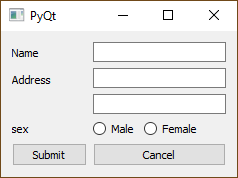